In [1]:
import numpy as np    
import pandas as pd

import tensorflow as tf                       
                       
import matplotlib.pyplot as plt   
import seaborn as sns            

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


![image.png](attachment:image.png)

In [3]:
print(X_train)
print(X_train.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(60000, 28, 28)


In [4]:
print(X_test)
print(X_test.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(10000, 28, 28)


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

![image.png](attachment:image.png)

In [6]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape= (28,28)),
#                                   tf.keras.layers.Dense(128, activation='relu'),
#                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten

model = tf.keras.models.Sequential()

model.add(Flatten(input_shape = (28,28)))

model.add(Dense(128, activation = 'relu' ))

model.add(Dense(10 , activation = tf.nn.softmax)) # model.add(Dense(10 , activation = 'softmax'))

In [17]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train , epochs = 10 , verbose = 2 , validation_split = 0.1)

Epoch 1/10
1688/1688 - 5s - loss: 0.2684 - accuracy: 0.9230 - val_loss: 0.1206 - val_accuracy: 0.9675 - 5s/epoch - 3ms/step
Epoch 2/10
1688/1688 - 4s - loss: 0.1179 - accuracy: 0.9648 - val_loss: 0.0922 - val_accuracy: 0.9740 - 4s/epoch - 2ms/step
Epoch 3/10
1688/1688 - 4s - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0816 - val_accuracy: 0.9738 - 4s/epoch - 2ms/step
Epoch 4/10
1688/1688 - 3s - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.0771 - val_accuracy: 0.9760 - 3s/epoch - 2ms/step
Epoch 5/10
1688/1688 - 3s - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0795 - val_accuracy: 0.9772 - 3s/epoch - 2ms/step
Epoch 6/10
1688/1688 - 4s - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0697 - val_accuracy: 0.9802 - 4s/epoch - 2ms/step
Epoch 7/10
1688/1688 - 3s - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0744 - val_accuracy: 0.9802 - 3s/epoch - 2ms/step
Epoch 8/10
1688/1688 - 4s - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0826 - val_accuracy: 0.9778 - 4s/epoch - 2ms/step
Epoch 9/

In [20]:
model.history.history   

{'loss': [0.2683987617492676,
  0.11786069720983505,
  0.0814681425690651,
  0.06003232300281525,
  0.04643451049923897,
  0.03536282107234001,
  0.027823403477668762,
  0.021866388618946075,
  0.018009906634688377,
  0.015711618587374687],
 'accuracy': [0.923037052154541,
  0.9648333191871643,
  0.9753888845443726,
  0.9815185070037842,
  0.985370397567749,
  0.9893333315849304,
  0.9913889169692993,
  0.9935185313224792,
  0.9947222471237183,
  0.9952222108840942],
 'val_loss': [0.1205860897898674,
  0.09221573173999786,
  0.08164649456739426,
  0.07707774639129639,
  0.07950135320425034,
  0.06973250955343246,
  0.07436173409223557,
  0.08257877826690674,
  0.07552032172679901,
  0.0819181352853775],
 'val_accuracy': [0.9674999713897705,
  0.9739999771118164,
  0.9738333225250244,
  0.9760000109672546,
  0.9771666526794434,
  0.9801666736602783,
  0.9801666736602783,
  0.9778333306312561,
  0.9794999957084656,
  0.9804999828338623]}

In [21]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.268399,0.923037,0.120586,0.967500
1,0.117861,0.964833,0.092216,0.974000
2,0.081468,0.975389,0.081646,0.973833
3,0.060032,0.981519,0.077078,0.976000
4,0.046435,0.985370,0.079501,0.977167


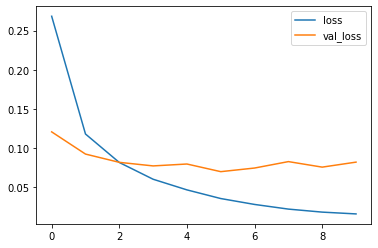

In [22]:
plt.plot(history['loss'] , label = 'loss')
plt.plot(history['val_loss'] , label = 'val_loss')
plt.legend()

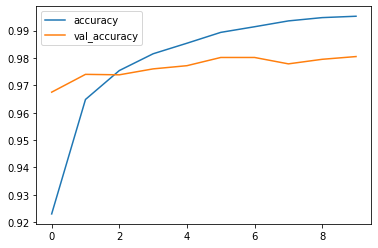

In [23]:
plt.plot(history['accuracy'] , label = 'accuracy')
plt.plot(history['val_accuracy'] , label = 'val_accuracy')
plt.legend()

In [24]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9802
[0.07483850419521332, 0.9801999926567078]


In [31]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 [==============================] - 0s 2ms/step


In [32]:
labels = ['0',
'1',
'2',
'3',
'4',
'5',
'6',
'7',
'8',
'9']

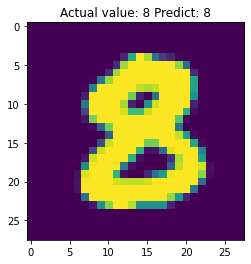

In [37]:
import random

i = random.randint(0, 9999)

plt.imshow(X_test[i])

l1 = labels[y_test[i]]

l2 = labels[y_pred[i]]
plt.title(f"Actual value: {l1} Predict: {l2}" );

In [ ]:
# Done.